# Vamos Fazer alguns exercícios!!!

# 1 - base de dados titanic.csv
Contém informações sobre os passageiros do titanic.

Realize o tratamento de dados seguindo o que se pede e use algum modelo para prever se o passageiro iria sobreviver ou não.

In [249]:
# Importar a biblioteca pandas com o apelido pd
import pandas as pd

In [250]:
# Criar a variável df e ler a base de dados
df = pd.read_csv('titanic.csv')

In [251]:
# Exibir as 5 primeiro linhas da base de dados
df.head()

,identificacao,classe_da_passagem,nome,sexo,idade,irmaos_a_bordo,pais_ou_filhos_a_bordo,bilhete,valor_bilhete,cabine,porto_de_embarque,sobreviveu
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [252]:
# Exiba informações descritivas dos dados numéricos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
identificacao,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
classe_da_passagem,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
idade,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
irmaos_a_bordo,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
pais_ou_filhos_a_bordo,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
valor_bilhete,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
sobreviveu,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


In [253]:
# Exiba informações descritivas dos dados textuais
df.describe(include='O').T

,count,unique,top,freq
nome,891,891,"Braund, Mr. Owen Harris",1
sexo,891,2,male,577
bilhete,891,681,347082,7
cabine,204,147,B96 B98,4
porto_de_embarque,889,3,S,644


In [254]:
# Exiba a quantidade de linhas da tabela 
#(Quantidade de passageiros (cada passageiro é uma linha))
df.shape[0]

891

In [255]:
# Exiba a quantidade de valores nulos por coluna
df.isnull().sum()

identificacao               0
classe_da_passagem          0
nome                        0
sexo                        0
idade                     177
irmaos_a_bordo              0
pais_ou_filhos_a_bordo      0
bilhete                     0
valor_bilhete               0
cabine                    687
porto_de_embarque           2
sobreviveu                  0
dtype: int64

In [256]:
# Exiba a porcentagem de valores nulos por coluna
round(df.isnull().sum()*100/len(df),2)

identificacao              0.00
classe_da_passagem         0.00
nome                       0.00
sexo                       0.00
idade                     19.87
irmaos_a_bordo             0.00
pais_ou_filhos_a_bordo     0.00
bilhete                    0.00
valor_bilhete              0.00
cabine                    77.10
porto_de_embarque          0.22
sobreviveu                 0.00
dtype: float64

In [257]:
# Exiba o tipo de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   identificacao           891 non-null    int64  
 1   classe_da_passagem      891 non-null    int64  
 2   nome                    891 non-null    object 
 3   sexo                    891 non-null    object 
 4   idade                   714 non-null    float64
 5   irmaos_a_bordo          891 non-null    int64  
 6   pais_ou_filhos_a_bordo  891 non-null    int64  
 7   bilhete                 891 non-null    object 
 8   valor_bilhete           891 non-null    float64
 9   cabine                  204 non-null    object 
 10  porto_de_embarque       889 non-null    object 
 11  sobreviveu              891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [258]:
# Exclua a coluna com + de 50% de valores nulos
df.drop("cabine",inplace = True, axis = 1)

In [259]:
# Exclua a coluna bilhete - esta coluna representa o 
# identificador do bilhete (Cada bilhete é único)
df.drop("bilhete",inplace = True, axis = 1)

In [260]:
# Exclua a coluna nome
df.drop("nome",inplace=True,axis=1)

In [261]:
# Substitua os valores nulos de idade pela moda da coluna
df.loc[df['idade'].isnull(),'idade'] = df.idade.mode()[0]

In [262]:
df.isnull().sum()*100/len(df)

identificacao             0.000000
classe_da_passagem        0.000000
sexo                      0.000000
idade                     0.000000
irmaos_a_bordo            0.000000
pais_ou_filhos_a_bordo    0.000000
valor_bilhete             0.000000
porto_de_embarque         0.224467
sobreviveu                0.000000
dtype: float64

In [263]:
df.loc[df['porto_de_embarque'].isna()]

,identificacao,classe_da_passagem,sexo,idade,irmaos_a_bordo,pais_ou_filhos_a_bordo,valor_bilhete,porto_de_embarque,sobreviveu
61,62,1,female,38.0,0,0,80.0,NaN,1
829,830,1,female,62.0,0,0,80.0,NaN,1


In [264]:
df.drop(df.loc[df['porto_de_embarque'].isna()].index, inplace = True)

In [265]:
df.isnull().sum()*100/len(df)

identificacao             0.0
classe_da_passagem        0.0
sexo                      0.0
idade                     0.0
irmaos_a_bordo            0.0
pais_ou_filhos_a_bordo    0.0
valor_bilhete             0.0
porto_de_embarque         0.0
sobreviveu                0.0
dtype: float64

In [266]:
# Converta as colunas textuais (object) para valores numéricos 
# com o label encoder, com o loc ou com replace (usando dicionário)
df.dtypes

identificacao               int64
classe_da_passagem          int64
sexo                       object
idade                     float64
irmaos_a_bordo              int64
pais_ou_filhos_a_bordo      int64
valor_bilhete             float64
porto_de_embarque          object
sobreviveu                  int64
dtype: object

## Conversão da coluna sexo para numerico

In [267]:
df.sexo

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sexo, Length: 889, dtype: object

In [268]:
df.loc[df['sexo']== 'male','sexo'] = 1

In [269]:
df.loc[df['sexo']== 'female','sexo'] = 0

In [270]:
df['sexo']= pd.to_numeric(df['sexo'])

In [271]:
df['sexo'].dtype

dtype('int64')

## Conversão da coluna porto_de_embarque em numerico

In [272]:
df.porto_de_embarque.unique()

array(['S', 'C', 'Q'], dtype=object)

In [273]:
mapeamento_porto_de_embarque = {'S':1,'C':2,'Q':3}

df['porto_de_embarque']= df['porto_de_embarque'].replace(mapeamento_porto_de_embarque).astype(int)

In [274]:
df.porto_de_embarque.unique()

array([1, 2, 3])

In [275]:
df.dtypes

identificacao               int64
classe_da_passagem          int64
sexo                        int64
idade                     float64
irmaos_a_bordo              int64
pais_ou_filhos_a_bordo      int64
valor_bilhete             float64
porto_de_embarque           int32
sobreviveu                  int64
dtype: object

In [276]:
df.head(5)

,identificacao,classe_da_passagem,sexo,idade,irmaos_a_bordo,pais_ou_filhos_a_bordo,valor_bilhete,porto_de_embarque,sobreviveu
0,1,3,1,22.0,1,0,7.2500,1,0
1,2,1,0,38.0,1,0,71.2833,2,1
2,3,3,0,26.0,0,0,7.9250,1,1
3,4,1,0,35.0,1,0,53.1000,1,1
4,5,3,1,35.0,0,0,8.0500,1,0


In [277]:
# Separe os dados em X e y
X = df.drop('sobreviveu', axis = 1)
y = df[['sobreviveu']]

In [278]:
# Separe os dados em X e y de Treinamento e Teste com 20% para teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
# Normalize X de Treinamento e Teste
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()

X_train = normalizador.fit_transform(X_train)
X_test = normalizador.fit_transform(X_test)

In [280]:
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
def avaliar_model(y_test, y_pred):
    # Criando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotando a matriz de confusão com um heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Exibindo o classification report
    print(classification_report(y_test, y_pred))

C:\Users\Rosemary\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


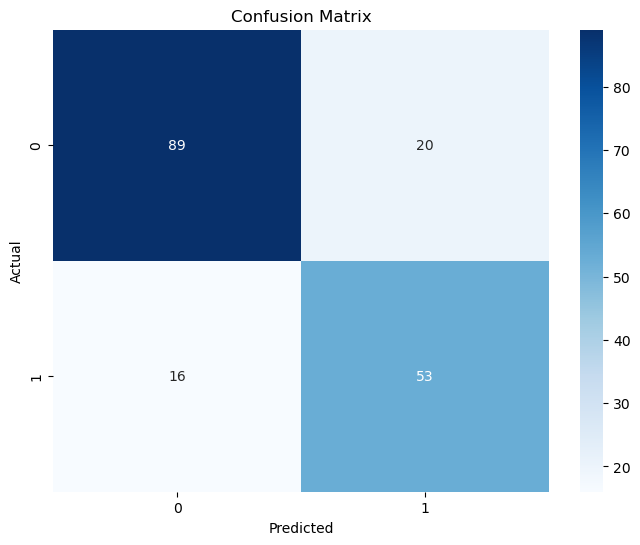

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [282]:
# Aplique o algoritmo svm para treinar e, em seguida,
# faça as previsões no X de teste e gere as métricas de desempenho do modelo 
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

avaliar_model(y_test, y_pred)

C:\Users\Rosemary\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


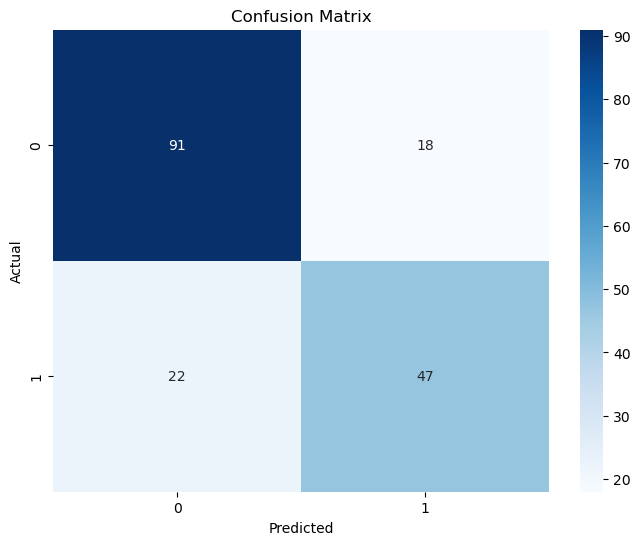

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.72      0.68      0.70        69

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178



In [283]:
# Aplique o algoritmo GaussianNB para treinar e, em seguida,
# faça as previsões no X de teste e gere as métricas de desempenho do modelo 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

avaliar_model(y_test, y_pred)

# Maravilha!
O que vimos acima é um passo a passo do que devemos fazer até treinar um modelo de machine learning. 

Resumindo, temos:
* 1 - Analisar os dados
* 2 - Tratar os dados (Excluir colunas irrelevantes, tratar valores nulos e converter dados textuais para numéricos)
* 3 - Preparar os dados para aplicar ao modelo (Separar em X e y, Separar em treinamento e teste e Normalizar)
* 4 - Treinar modelos e validar os modelos (com a acurácia e a matriz de confusão)
* 5 - Aplicar novos dados 

# 2 - Base de dados banco_anonimo.csv
Esta base de dados é de outro banco que disponibilizou uma pesquisa com alguns dados anonimizados.

In [284]:
# Realize a leitura da base de dados
df_anonimo = pd.read_csv('banco_anonimo.csv')
df.head()

,identificacao,classe_da_passagem,sexo,idade,irmaos_a_bordo,pais_ou_filhos_a_bordo,valor_bilhete,porto_de_embarque,sobreviveu
0,1,3,1,22.0,1,0,7.2500,1,0
1,2,1,0,38.0,1,0,71.2833,2,1
2,3,3,0,26.0,0,0,7.9250,1,1
3,4,1,0,35.0,1,0,53.1000,1,1
4,5,3,1,35.0,0,0,8.0500,1,0


Vamos exercitar os conhecimentos com o loc

In [285]:
# Selecione os registros com idade igual a 25
df_anonimo.loc[df_anonimo['idade'] == 25]

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
5,25,admin.,single,unknown,no,no,telephone,jun,tue,221.0,...,7,999,0,NaN,-2.9,92.963,-40.8,1.286,5076.2,yes
32,25,blue-collar,married,high.school,yes,yes,telephone,may,mon,741.0,...,6,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,yes
63,25,services,single,basic.9y,yes,no,cellular,jul,wed,509.0,...,1,999,0,NaN,1.4,93.918,-42.7,4.963,5228.1,yes
89,25,student,single,university.degree,no,yes,telephone,jun,thu,280.0,...,6,999,1,failure,-2.9,92.963,-40.8,1.235,5076.2,yes
175,25,technician,single,high.school,no,yes,cellular,jul,fri,112.0,...,2,999,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8820,25,services,single,unknown,yes,no,cellular,jun,tue,516.0,...,1,13,2,failure,-1.7,94.055,-39.8,0.702,4991.6,yes
8873,25,student,single,unknown,no,no,cellular,aug,fri,248.0,...,1,999,0,NaN,-2.9,92.201,-31.4,0.825,5076.2,no
8990,25,student,single,high.school,yes,yes,telephone,aug,fri,461.0,...,1,999,0,NaN,-1.7,94.027,-38.3,0.898,4991.6,yes
9157,25,blue-collar,married,basic.9y,yes,no,telephone,may,fri,763.0,...,1,999,0,NaN,1.1,93.994,-36.4,4.864,5191.0,yes


In [286]:
# Selecione os registros com idade inferior a 20
df_anonimo.loc[df_anonimo['idade'] < 20]

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
293,17,student,single,basic.9y,unknown,unknown,cellular,aug,fri,498.0,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
632,19,student,single,basic.6y,yes,yes,cellular,sep,thu,452.0,...,5,13,1,success,-1.1,94.199,-37.5,0.879,4963.6,yes
1119,18,student,single,unknown,no,no,cellular,sep,thu,385.0,...,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes
1599,19,student,single,basic.6y,yes,no,cellular,mar,tue,313.0,...,1,5,2,success,-1.8,93.369,-34.8,0.655,5008.7,yes
1821,19,student,single,unknown,yes,no,cellular,apr,fri,452.0,...,3,999,0,NaN,-1.8,93.075,-47.1,1.405,5099.1,yes
2310,18,student,single,unknown,unknown,unknown,cellular,sep,thu,72.0,...,2,999,0,NaN,-3.4,92.379,-29.8,0.809,5017.5,no
2605,18,student,single,unknown,yes,no,cellular,sep,fri,563.0,...,1,999,0,NaN,-3.4,92.379,-29.8,0.803,5017.5,yes
3072,18,student,single,basic.9y,no,no,cellular,dec,thu,412.0,...,2,999,0,NaN,-3.0,92.713,-33.0,0.712,5023.5,yes
3283,18,student,single,basic.4y,yes,no,cellular,jun,tue,154.0,...,1,999,0,NaN,-1.7,94.055,-39.8,0.737,4991.6,no
3305,18,student,single,unknown,yes,no,cellular,may,tue,489.0,...,1,6,1,success,-1.8,93.876,-40.0,0.668,5008.7,yes


In [287]:
# Selecione os registros com idade superior a 70
df_anonimo.loc[df_anonimo['idade'] > 70]

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
45,72,retired,married,basic.4y,yes,no,cellular,may,wed,443.0,...,4,999,0,NaN,-1.8,93.876,-40.0,0.672,5008.7,yes
56,72,retired,married,basic.6y,yes,no,cellular,jul,wed,143.0,...,1,999,0,NaN,-1.7,94.215,-40.3,0.881,4991.6,yes
58,79,housemaid,married,basic.4y,no,no,cellular,aug,fri,126.0,...,1,3,2,success,-2.9,92.201,-31.4,0.849,5076.2,yes
78,76,housemaid,married,basic.4y,no,no,cellular,jun,tue,296.0,...,5,999,0,NaN,-1.7,94.055,-39.8,0.702,4991.6,yes
144,73,retired,married,university.degree,no,no,cellular,nov,fri,160.0,...,1,999,0,NaN,-3.4,92.649,-30.1,0.718,5017.5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,82,retired,married,professional.course,yes,no,telephone,mar,mon,506.0,...,2,999,0,NaN,-1.8,93.369,-34.8,0.646,5008.7,yes
9026,76,retired,married,university.degree,yes,no,cellular,aug,thu,504.0,...,2,6,3,success,-1.7,94.027,-38.3,0.899,4991.6,yes
9162,80,retired,divorced,basic.4y,yes,yes,cellular,apr,wed,654.0,...,2,999,0,NaN,-1.8,93.749,-34.6,0.642,5008.7,yes
9240,84,retired,divorced,unknown,no,no,cellular,sep,tue,333.0,...,1,3,2,success,-1.1,94.199,-37.5,0.877,4963.6,yes


In [288]:
# Selecione os registros com idade entre 24 e 44 
df_anonimo.loc[(df_anonimo['idade'] >= 24) & (df_anonimo['idade'] <= 44 )]

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
0,35,admin.,single,university.degree,yes,no,cellular,may,thu,143.0,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,42,technician,married,professional.course,no,no,telephone,may,tue,1623.0,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,yes
2,36,admin.,married,university.degree,no,no,cellular,aug,mon,610.0,...,2,999,0,NaN,1.4,93.444,-36.1,4.965,5228.1,yes
3,37,admin.,married,high.school,yes,yes,telephone,jul,wed,1089.0,...,2,999,0,NaN,1.4,93.918,-42.7,4.963,5228.1,yes
4,31,management,single,university.degree,yes,no,cellular,apr,thu,211.0,...,1,999,0,NaN,-1.8,93.075,-47.1,1.365,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,34,technician,married,unknown,no,no,cellular,nov,tue,985.0,...,3,999,0,NaN,-1.1,94.767,-50.8,1.046,4963.6,yes
9272,39,entrepreneur,married,basic.6y,yes,no,cellular,sep,tue,265.0,...,2,16,1,success,-3.4,92.379,-29.8,0.819,5017.5,yes
9273,34,blue-collar,married,basic.4y,no,no,telephone,jun,tue,404.0,...,13,999,0,NaN,1.4,94.465,-41.8,4.864,5228.1,no
9277,38,blue-collar,married,basic.9y,yes,no,cellular,apr,fri,612.0,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no


In [289]:
# Selecione os registros de pessoas que possuem casa (yes), tem conta há mais de 300 dias e estão solteiras (single)
df_anonimo.loc[(df_anonimo['casa'] == 'yes') & (df_anonimo['tempo_conta'] > 300) & (df_anonimo['estado_civil'] == 'single')]                  

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
20,27,admin.,single,university.degree,yes,no,cellular,may,thu,1543.0,...,4,999,0,NaN,-1.8,92.893,-46.2,1.266,5099.1,yes
38,29,technician,single,university.degree,yes,no,cellular,apr,wed,389.0,...,2,999,0,NaN,-1.8,93.075,-47.1,1.415,5099.1,yes
48,39,services,single,high.school,yes,yes,telephone,jun,mon,563.0,...,1,999,0,NaN,1.4,94.465,-41.8,4.865,5228.1,yes
63,25,services,single,basic.9y,yes,no,cellular,jul,wed,509.0,...,1,999,0,NaN,1.4,93.918,-42.7,4.963,5228.1,yes
66,33,blue-collar,single,basic.6y,yes,no,cellular,may,tue,731.0,...,3,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,32,admin.,single,university.degree,yes,no,cellular,aug,thu,457.0,...,1,999,0,NaN,1.4,93.444,-36.1,4.964,5228.1,no
9241,47,admin.,single,high.school,yes,no,cellular,may,mon,911.0,...,3,999,0,NaN,-1.8,92.893,-46.2,1.299,5099.1,yes
9244,35,services,single,basic.4y,yes,no,telephone,may,tue,1777.0,...,1,999,0,NaN,1.1,93.994,-36.4,4.856,5191.0,yes
9266,38,blue-collar,single,high.school,yes,no,telephone,mar,wed,557.0,...,1,999,0,NaN,-1.8,93.369,-34.8,0.655,5008.7,yes


In [290]:
# Selecione as pessoas que possuem empréstimo, não possuem casa e são casadas (estado_civil = married)
df_anonimo.loc[(df_anonimo['emprestimo'] == 'yes') & (df_anonimo['casa'] == 'no') & (df_anonimo['estado_civil'] == 'married')]    

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
17,36,services,married,university.degree,no,yes,cellular,jun,tue,255.0,...,2,3,1,success,-2.9,92.963,-40.8,1.206,5076.2,yes
76,47,self-employed,married,university.degree,no,yes,cellular,jul,mon,83.0,...,4,999,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
84,44,blue-collar,married,unknown,no,yes,telephone,may,tue,431.0,...,1,999,0,NaN,1.1,93.994,-36.4,4.856,5191.0,no
122,37,self-employed,married,professional.course,no,yes,telephone,may,fri,254.0,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
181,53,admin.,married,university.degree,no,yes,cellular,jul,wed,122.0,...,3,999,0,NaN,1.4,93.918,-42.7,4.963,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9029,48,blue-collar,married,basic.4y,no,yes,cellular,apr,thu,220.0,...,1,999,0,NaN,-1.8,93.075,-47.1,1.410,5099.1,no
9057,55,unemployed,married,basic.9y,no,yes,cellular,may,mon,296.0,...,1,999,0,NaN,-1.8,92.893,-46.2,1.264,5099.1,yes
9164,40,services,married,high.school,no,yes,telephone,may,fri,762.0,...,3,999,0,NaN,1.1,93.994,-36.4,4.864,5191.0,yes
9237,33,services,married,university.degree,no,yes,cellular,aug,thu,149.0,...,8,999,0,NaN,1.4,93.444,-36.1,4.962,5228.1,no


In [291]:
# Selecione as pessoas que possuem menos de 29 anos e são divorciadas (estado_civil = divorced)
df_anonimo.loc[(df_anonimo['idade'] < 29 ) & (df_anonimo['estado_civil'] == 'divorced')]

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
221,28,technician,divorced,university.degree,no,no,cellular,jul,wed,265.0,...,1,999,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
390,28,services,divorced,high.school,no,yes,cellular,jul,fri,278.0,...,2,999,0,NaN,1.4,93.918,-42.7,4.957,5228.1,yes
951,25,self-employed,divorced,university.degree,no,no,cellular,apr,mon,241.0,...,1,999,0,NaN,-1.8,93.075,-47.1,1.405,5099.1,yes
1125,28,blue-collar,divorced,high.school,no,no,cellular,may,thu,307.0,...,1,999,2,failure,-1.8,92.893,-46.2,1.266,5099.1,yes
3298,26,technician,divorced,university.degree,no,no,cellular,jun,tue,437.0,...,1,999,0,NaN,-2.9,92.963,-40.8,1.262,5076.2,yes
3598,28,admin.,divorced,university.degree,yes,no,cellular,may,thu,1148.0,...,1,999,0,NaN,-1.8,92.893,-46.2,1.327,5099.1,yes
4151,25,services,divorced,high.school,yes,yes,cellular,jun,thu,437.0,...,2,999,0,NaN,-2.9,92.963,-40.8,1.260,5076.2,yes
4223,25,self-employed,divorced,university.degree,no,yes,cellular,apr,mon,163.0,...,1,999,0,NaN,-1.8,93.075,-47.1,1.405,5099.1,yes
5394,25,blue-collar,divorced,basic.9y,unknown,unknown,telephone,jun,mon,185.0,...,2,999,0,NaN,1.4,94.465,-41.8,4.961,5228.1,no
6532,28,blue-collar,divorced,high.school,yes,no,telephone,may,mon,7.0,...,1,999,0,NaN,1.1,93.994,-36.4,4.858,5191.0,no


In [292]:
# Selecione as pessoas com emprego de gerente(management) e idade maior que 50
df_anonimo.loc[(df_anonimo['emprego'] == 'management') & (df_anonimo['idade'] > 50)]

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
37,55,management,married,university.degree,yes,no,cellular,jun,tue,114.0,...,3,999,0,NaN,-2.9,92.963,-40.8,1.252,5076.2,yes
97,52,management,married,university.degree,yes,no,cellular,aug,thu,175.0,...,3,1,3,success,-1.7,94.027,-38.3,0.899,4991.6,yes
99,52,management,divorced,university.degree,no,no,cellular,may,wed,451.0,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,yes
189,59,management,married,university.degree,yes,no,cellular,dec,thu,646.0,...,3,6,1,success,-3.0,92.713,-33.0,0.700,5023.5,no
257,57,management,married,university.degree,yes,no,cellular,nov,fri,108.0,...,1,999,0,NaN,-0.1,93.200,-42.0,4.021,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,57,management,divorced,university.degree,yes,no,telephone,may,wed,236.0,...,1,999,0,NaN,1.1,93.994,-36.4,4.856,5191.0,no
9083,57,management,married,professional.course,yes,no,cellular,nov,thu,224.0,...,2,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no
9101,56,management,married,university.degree,no,no,telephone,jun,wed,154.0,...,4,999,0,NaN,1.4,94.465,-41.8,4.962,5228.1,no
9181,52,management,married,professional.course,yes,no,cellular,jul,mon,491.0,...,3,999,0,NaN,1.4,93.918,-42.7,4.960,5228.1,yes


In [293]:
# Selecione as pessoas com emprego de gerente(management), idade maior que 50 e possuem empréstimo
df_anonimo.loc[(df_anonimo['emprego'] == 'management') & (df_anonimo['idade'] > 50) & (df_anonimo['emprestimo'] == 'yes')]

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
1795,51,management,married,high.school,yes,yes,cellular,aug,fri,228.0,...,4,999,0,NaN,-2.9,92.201,-31.4,0.849,5076.2,yes
2090,53,management,divorced,university.degree,no,yes,cellular,nov,fri,368.0,...,2,3,1,success,-3.4,92.649,-30.1,0.716,5017.5,yes
2686,53,management,married,basic.9y,yes,yes,cellular,jul,fri,1041.0,...,2,999,0,NaN,1.4,93.918,-42.7,4.963,5228.1,yes
3411,54,management,married,university.degree,no,yes,cellular,aug,wed,990.0,...,1,999,0,NaN,1.4,93.444,-36.1,4.965,5228.1,yes
5502,57,management,married,university.degree,yes,yes,cellular,nov,fri,536.0,...,1,999,0,NaN,-0.1,93.200,-42.0,4.021,5195.8,yes
5849,53,management,married,unknown,yes,yes,cellular,jul,mon,88.0,...,9,999,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
6149,57,management,married,university.degree,yes,yes,cellular,nov,tue,609.0,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,yes
6389,52,management,married,high.school,yes,yes,cellular,aug,tue,167.0,...,1,10,4,failure,-2.9,92.201,-31.4,0.883,5076.2,yes
6445,60,management,single,university.degree,yes,yes,cellular,mar,wed,194.0,...,1,999,0,NaN,-1.8,92.843,-50.0,1.602,5099.1,yes
6593,51,management,married,university.degree,no,yes,telephone,may,thu,1156.0,...,2,999,0,NaN,1.1,93.994,-36.4,4.860,5191.0,yes


In [294]:
df_anonimo.emprego.unique()

array(['admin.', 'technician', 'management', 'blue-collar', 'retired',
       'services', 'student', 'unknown', 'housemaid', 'unemployed',
       'entrepreneur', 'self-employed'], dtype=object)

# Realizes os passo de 1 até 4 para aplicar um modelo de machine learning na base banco_anonimo.csv

## Passo 1

In [295]:
df_anonimo.head()

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_6,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
0,35,admin.,single,university.degree,yes,no,cellular,may,thu,143.0,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,42,technician,married,professional.course,no,no,telephone,may,tue,1623.0,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,yes
2,36,admin.,married,university.degree,no,no,cellular,aug,mon,610.0,...,2,999,0,NaN,1.4,93.444,-36.1,4.965,5228.1,yes
3,37,admin.,married,high.school,yes,yes,telephone,jul,wed,1089.0,...,2,999,0,NaN,1.4,93.918,-42.7,4.963,5228.1,yes
4,31,management,single,university.degree,yes,no,cellular,apr,thu,211.0,...,1,999,0,NaN,-1.8,93.075,-47.1,1.365,5099.1,no


In [296]:
df_anonimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             9280 non-null   int64  
 1   emprego           9280 non-null   object 
 2   estado_civil      9280 non-null   object 
 3   educacao          9280 non-null   object 
 4   casa              9280 non-null   object 
 5   emprestimo        9280 non-null   object 
 6   contatos          9280 non-null   object 
 7   mes               9280 non-null   object 
 8   dia               9280 non-null   object 
 9   tempo_conta       9162 non-null   float64
 10  anonimizado_1     9280 non-null   int64  
 11  anonimizado_2     9280 non-null   object 
 12  anonimizado_3     9280 non-null   int64  
 13  anonimizado_4     9280 non-null   int64  
 14  anonimizado_5     9280 non-null   int64  
 15  anonimizado_6     2061 non-null   object 
 16  anonimizado_7     9280 non-null   float64


In [297]:
df_anonimo.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,9280.0,40.458836,11.963006,17.000,32.000,38.000,48.000,98.000
tempo_conta,9162.0,389.847413,357.929093,0.000,148.000,269.000,530.000,4199.000
anonimizado_1,9280.0,24826.214224,12425.733760,1.000,14310.500,27390.000,36751.500,41186.000
anonimizado_3,9280.0,2.320905,2.294474,1.000,1.000,2.000,3.000,35.000
anonimizado_4,9280.0,888.347198,312.500496,0.000,999.000,999.000,999.000,999.000
anonimizado_5,9280.0,0.316703,0.699808,0.000,0.000,0.000,0.000,6.000
anonimizado_7,9280.0,-0.492748,1.723356,-3.400,-1.800,-0.100,1.400,1.400
anonimizado_8,9280.0,93.482002,0.634630,92.201,92.893,93.444,93.994,94.767
anonimizado_9,9280.0,-40.181897,5.359290,-50.800,-42.700,-41.800,-36.400,-26.900
anonimizado_10,9280.0,2.968123,1.890823,0.634,1.244,4.021,4.959,5.045


In [298]:
df_anonimo.describe(include = 'O').T

,count,unique,top,freq
emprego,9280,12,admin.,2561
estado_civil,9280,4,married,5393
educacao,9280,8,university.degree,3040
casa,9280,3,yes,4937
emprestimo,9280,3,no,7691
contatos,9280,2,cellular,6625
mes,9280,10,may,2512
dia,9280,5,thu,1999
anonimizado_2,9280,2,no,7777
anonimizado_6,2061,2,failure,1108


In [299]:
df_anonimo.isna().sum()

idade                  0
emprego                0
estado_civil           0
educacao               0
casa                   0
emprestimo             0
contatos               0
mes                    0
dia                    0
tempo_conta          118
anonimizado_1          0
anonimizado_2          0
anonimizado_3          0
anonimizado_4          0
anonimizado_5          0
anonimizado_6       7219
anonimizado_7          0
anonimizado_8          0
anonimizado_9          0
anonimizado_10         0
anonimizado_11         0
aceitou_proposta       0
dtype: int64

In [300]:
round(df_anonimo.isnull().sum()*100/len(df_anonimo),2)

idade                0.00
emprego              0.00
estado_civil         0.00
educacao             0.00
casa                 0.00
emprestimo           0.00
contatos             0.00
mes                  0.00
dia                  0.00
tempo_conta          1.27
anonimizado_1        0.00
anonimizado_2        0.00
anonimizado_3        0.00
anonimizado_4        0.00
anonimizado_5        0.00
anonimizado_6       77.79
anonimizado_7        0.00
anonimizado_8        0.00
anonimizado_9        0.00
anonimizado_10       0.00
anonimizado_11       0.00
aceitou_proposta     0.00
dtype: float64

## Passo 2

In [301]:
df_anonimo.loc[df_anonimo['tempo_conta'].isnull(),'tempo_conta'] = df_anonimo.tempo_conta.mean()

In [302]:
round(df_anonimo.isnull().sum()*100/len(df_anonimo),2)

idade                0.00
emprego              0.00
estado_civil         0.00
educacao             0.00
casa                 0.00
emprestimo           0.00
contatos             0.00
mes                  0.00
dia                  0.00
tempo_conta          0.00
anonimizado_1        0.00
anonimizado_2        0.00
anonimizado_3        0.00
anonimizado_4        0.00
anonimizado_5        0.00
anonimizado_6       77.79
anonimizado_7        0.00
anonimizado_8        0.00
anonimizado_9        0.00
anonimizado_10       0.00
anonimizado_11       0.00
aceitou_proposta     0.00
dtype: float64

In [303]:
df_anonimo.drop('anonimizado_6',inplace = True, axis = 1)

In [304]:
round(df_anonimo.isnull().sum()*100/len(df_anonimo),2)

idade               0.0
emprego             0.0
estado_civil        0.0
educacao            0.0
casa                0.0
emprestimo          0.0
contatos            0.0
mes                 0.0
dia                 0.0
tempo_conta         0.0
anonimizado_1       0.0
anonimizado_2       0.0
anonimizado_3       0.0
anonimizado_4       0.0
anonimizado_5       0.0
anonimizado_7       0.0
anonimizado_8       0.0
anonimizado_9       0.0
anonimizado_10      0.0
anonimizado_11      0.0
aceitou_proposta    0.0
dtype: float64

In [315]:
df_anonimo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7598 entries, 0 to 9278
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             7598 non-null   int64  
 1   emprego           7598 non-null   object 
 2   estado_civil      7598 non-null   object 
 3   educacao          7598 non-null   object 
 4   casa              7598 non-null   int64  
 5   emprestimo        7598 non-null   int64  
 6   contatos          7598 non-null   object 
 7   mes               7598 non-null   int64  
 8   dia               7598 non-null   int64  
 9   tempo_conta       7598 non-null   float64
 10  anonimizado_1     7598 non-null   int64  
 11  anonimizado_2     7598 non-null   int64  
 12  anonimizado_3     7598 non-null   int64  
 13  anonimizado_4     7598 non-null   int64  
 14  anonimizado_5     7598 non-null   int64  
 15  anonimizado_7     7598 non-null   float64
 16  anonimizado_8     7598 non-null   float64


In [316]:
df_anonimo.head()

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_2,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
0,35,admin.,single,university.degree,1,0,cellular,5,4,143.0,...,0,1,999,1,-1.8,92.893,-46.2,1.266,5099.1,0
1,42,technician,married,professional.course,0,0,telephone,5,2,1623.0,...,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1
2,36,admin.,married,university.degree,0,0,cellular,8,1,610.0,...,0,2,999,0,1.4,93.444,-36.1,4.965,5228.1,1
3,37,admin.,married,high.school,1,1,telephone,7,3,1089.0,...,0,2,999,0,1.4,93.918,-42.7,4.963,5228.1,1
4,31,management,single,university.degree,1,0,cellular,4,4,211.0,...,0,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,0


In [307]:
df_anonimo.drop(df_anonimo.loc[df_anonimo['casa'] == 'unknown' ].index, inplace=True)

In [308]:
df_anonimo.drop(df_anonimo.loc[df_anonimo['anonimizado_2'] == 'unknown' ].index, inplace=True)

In [309]:
mapeamento = {'no': 0, 'yes': 1}

colunas = ['casa','emprestimo','anonimizado_2','aceitou_proposta']

df_anonimo[colunas] = df_anonimo[colunas].replace(mapeamento)


In [310]:
df_anonimo['emprestimo'].unique()

array([0, 1], dtype=int64)

In [311]:
df_anonimo.loc[df_anonimo['mes'] == 'jan', 'mes'] = 1
df_anonimo.loc[df_anonimo['mes'] == 'feb', 'mes'] = 2
df_anonimo.loc[df_anonimo['mes'] == 'mar', 'mes'] = 3
df_anonimo.loc[df_anonimo['mes'] == 'apr', 'mes'] = 4
df_anonimo.loc[df_anonimo['mes'] == 'may', 'mes'] = 5
df_anonimo.loc[df_anonimo['mes'] == 'jun', 'mes'] = 6
df_anonimo.loc[df_anonimo['mes'] == 'jul', 'mes'] = 7
df_anonimo.loc[df_anonimo['mes'] == 'aug', 'mes'] = 8
df_anonimo.loc[df_anonimo['mes'] == 'sep', 'mes'] = 9
df_anonimo.loc[df_anonimo['mes'] == 'oct', 'mes'] = 10
df_anonimo.loc[df_anonimo['mes'] == 'nov', 'mes'] = 11
df_anonimo.loc[df_anonimo['mes'] == 'dec', 'mes'] = 12

# Define a coluna como valor numérico
df_anonimo['mes'] = pd.to_numeric(df_anonimo['mes'])

# Exibe o tipo de dados da coluna
df_anonimo[['mes']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7598 entries, 0 to 9278
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mes     7598 non-null   int64
dtypes: int64(1)
memory usage: 118.7 KB


In [312]:
df_anonimo['dia'].unique()

array(['thu', 'tue', 'mon', 'wed', 'fri'], dtype=object)

In [313]:
df_anonimo.loc[df_anonimo['dia'] == 'mon', 'dia'] = 1
df_anonimo.loc[df_anonimo['dia'] == 'tue', 'dia'] = 2
df_anonimo.loc[df_anonimo['dia'] == 'wed', 'dia'] = 3
df_anonimo.loc[df_anonimo['dia'] == 'thu', 'dia'] = 4
df_anonimo.loc[df_anonimo['dia'] == 'fri', 'dia'] = 5

df_anonimo['dia'] = pd.to_numeric(df_anonimo['dia'])

# Exibe o tipo de dados da coluna
df_anonimo[['dia']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7598 entries, 0 to 9278
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dia     7598 non-null   int64
dtypes: int64(1)
memory usage: 118.7 KB


In [247]:
df_anonimo['anonimizado_2'].unique()

array([0], dtype=object)

In [314]:
colunas_object = df_anonimo.select_dtypes(include=['object']).columns.tolist()
colunas_object

['emprego', 'estado_civil', 'educacao', 'contatos']

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [317]:
for coluna in colunas_object:
    
    df_anonimo[coluna] = le.fit_transform(df_anonimo[coluna])

In [318]:
df_anonimo.head()

,idade,emprego,estado_civil,educacao,casa,emprestimo,contatos,mes,dia,tempo_conta,...,anonimizado_2,anonimizado_3,anonimizado_4,anonimizado_5,anonimizado_7,anonimizado_8,anonimizado_9,anonimizado_10,anonimizado_11,aceitou_proposta
0,35,0,2,6,1,0,0,5,4,143.0,...,0,1,999,1,-1.8,92.893,-46.2,1.266,5099.1,0
1,42,9,1,5,0,0,1,5,2,1623.0,...,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1
2,36,0,1,6,0,0,0,8,1,610.0,...,0,2,999,0,1.4,93.444,-36.1,4.965,5228.1,1
3,37,0,1,3,1,1,1,7,3,1089.0,...,0,2,999,0,1.4,93.918,-42.7,4.963,5228.1,1
4,31,4,2,6,1,0,0,4,4,211.0,...,0,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,0


In [319]:
df_anonimo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7598 entries, 0 to 9278
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             7598 non-null   int64  
 1   emprego           7598 non-null   int32  
 2   estado_civil      7598 non-null   int32  
 3   educacao          7598 non-null   int32  
 4   casa              7598 non-null   int64  
 5   emprestimo        7598 non-null   int64  
 6   contatos          7598 non-null   int32  
 7   mes               7598 non-null   int64  
 8   dia               7598 non-null   int64  
 9   tempo_conta       7598 non-null   float64
 10  anonimizado_1     7598 non-null   int64  
 11  anonimizado_2     7598 non-null   int64  
 12  anonimizado_3     7598 non-null   int64  
 13  anonimizado_4     7598 non-null   int64  
 14  anonimizado_5     7598 non-null   int64  
 15  anonimizado_7     7598 non-null   float64
 16  anonimizado_8     7598 non-null   float64


## Passo 3

In [320]:
X = df_anonimo.drop('aceitou_proposta', axis = 1)
y = df_anonimo[['aceitou_proposta']]

In [321]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()

X_train = normalizador.fit_transform(X_train)
X_test = normalizador.fit_transform(X_test)

In [323]:
def avaliar_model(y_test, y_pred):
    # Criando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotando a matriz de confusão com um heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Exibindo o classification report
    print(classification_report(y_test, y_pred))

## Passo 4 

C:\Users\Rosemary\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


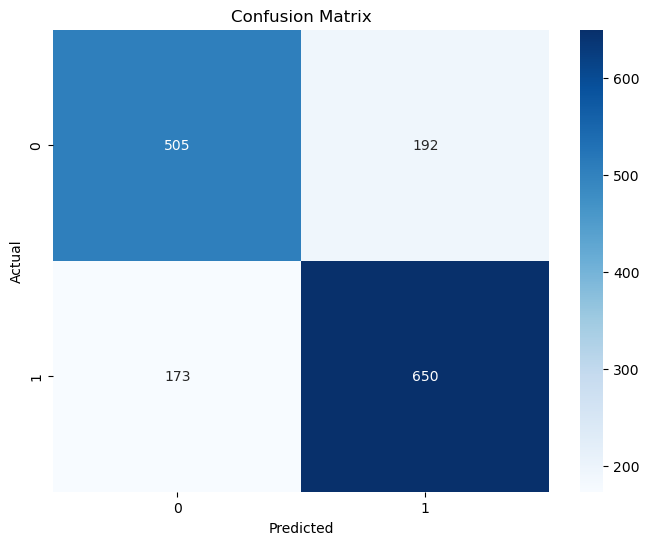

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       697
           1       0.77      0.79      0.78       823

    accuracy                           0.76      1520
   macro avg       0.76      0.76      0.76      1520
weighted avg       0.76      0.76      0.76      1520



In [324]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

avaliar_model(y_test, y_pred)